In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [71]:
df = pd.read_csv('../../dataset/train.csv')

### Change Data Type

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [78]:

df.drop(columns=['id'], inplace=True)

In [79]:
nums = ['Age', 'Driving_License', 'Previously_Insured', 'Annual_Premium', 'Vintage', 'Response']
cats = ['Gender', 'Vehicle_Age', 'Vehicle_Damage']

## Feature Transformation

In [74]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [75]:
# Normalisasi feature Age, Annual_Premium, dan Vintage
from sklearn.preprocessing import MinMaxScaler
df['Age'] = MinMaxScaler().fit_transform(df['Age'].values.reshape(len(df), 1))
df['Annual_Premium'] = MinMaxScaler().fit_transform(df['Annual_Premium'].values.reshape(len(df), 1))
df['Vintage'] = MinMaxScaler().fit_transform(df['Vintage'].values.reshape(len(df), 1))
df[['Age', 'Annual_Premium', 'Vintage']]

,Age,Annual_Premium,Vintage
0,0.369231,0.070366,0.716263
1,0.861538,0.057496,0.598616
2,0.415385,0.066347,0.058824
3,0.015385,0.048348,0.667820
4,0.138462,0.046259,0.100346
...,...,...,...
381104,0.830769,0.051234,0.269896
381105,0.153846,0.069551,0.418685
381106,0.015385,0.060439,0.522491
381107,0.738462,0.078110,0.221453


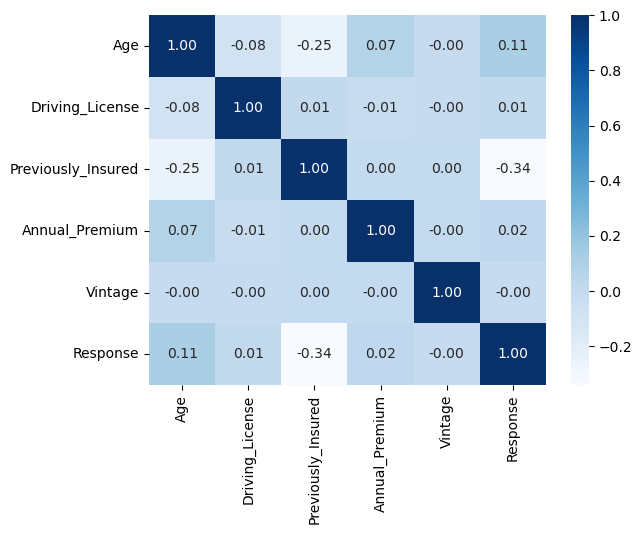

In [76]:
sns.heatmap(df[nums].corr(), annot=True, cmap='Blues', fmt='.2f')
plt.show()

## Feature Encoding

### Gender, Vehicle_Age, Vehicle_Damage

In [80]:
df[cats].describe()

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


In [82]:
mapping_gender = {
     'Male' : 0,
     'Female' : 1
}

mapping_vehicle_age = {
     '< 1 Year' : 0,
     '1-2 Year' : 1,
     '> 2 Years' : 2
}

mapping_vehicle_damage = {
     'No' : 0,
     'Yes' : 1
}

df['Gender'] = df['Gender'].map(mapping_gender)
df['Vehicle_Age'] = df['Vehicle_Age'].map(mapping_vehicle_age)
df['Vehicle_Damage'] = df['Vehicle_Damage'].map(mapping_vehicle_damage)

In [83]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,0.369231,1,28.0,0,2,1,0.070366,26.0,0.716263,1
1,0,0.861538,1,3.0,0,1,0,0.057496,26.0,0.598616,0
2,0,0.415385,1,28.0,0,2,1,0.066347,26.0,0.058824,1
3,0,0.015385,1,11.0,1,0,0,0.048348,152.0,0.667820,0
4,1,0.138462,1,41.0,1,0,0,0.046259,152.0,0.100346,0


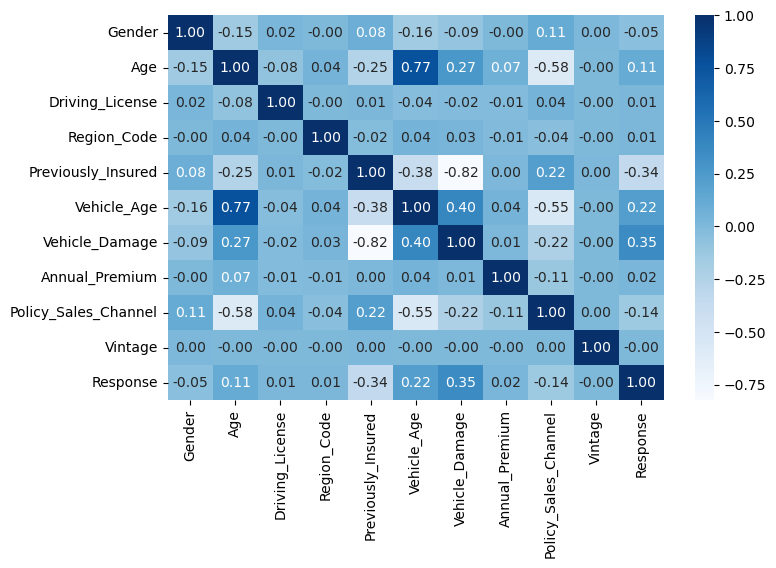

In [85]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, cmap='Blues', fmt='.2f')
plt.show()

### Region_Code

Region code memang merupakan fitur numerik namun feature ini merupakan numerik kategorikal. Maka dari itu fitur ini harus diberikan perlakuan khusus seperti label encoding dengan ranking yang jelas agar numerik pada fitur ini memiliki korelasi yang jelas dengan target.

In [86]:
region_df = df.groupby('Region_Code').agg({
    'Response': ['mean', 'count']
}).reset_index()

region_df_sorted = region_df.sort_values(by=('Response', 'mean'), ascending=True)

region_df_sorted = region_df_sorted.reset_index(drop=True)

region_df_sorted.head()

Region_Code  Response       
                   mean  count
0        44.0  0.040842    808
1        25.0  0.042749   2503
2        10.0  0.060128   4374
3        50.0  0.062677  10243
4        22.0  0.063407   1309

In [87]:
region_category_dict = dict(zip(region_df_sorted['Region_Code'], region_df_sorted.index + 1))

df['Region_Code'] = df['Region_Code'].map(region_category_dict)
df.head(3)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,0.369231,1,52,0,2,1,0.070366,26.0,0.716263,1
1,0,0.861538,1,44,0,1,0,0.057496,26.0,0.598616,0
2,0,0.415385,1,52,0,2,1,0.066347,26.0,0.058824,1


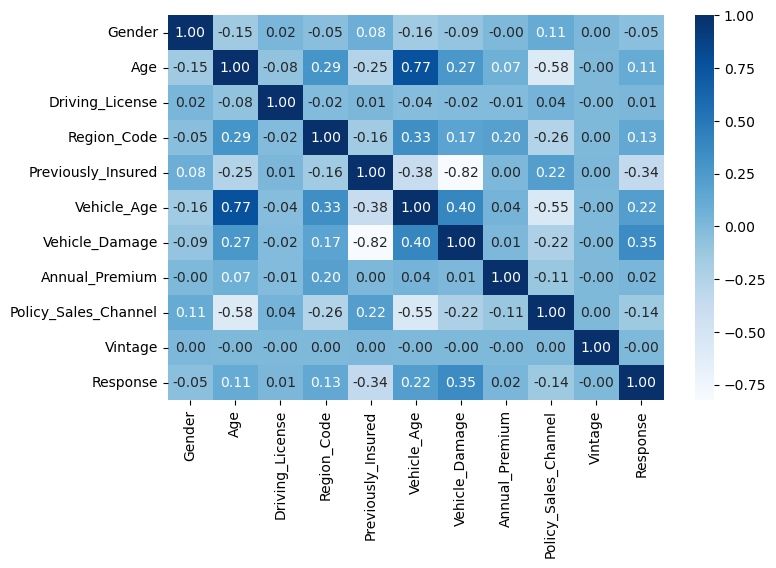

In [88]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()

### Policy Sales Channel

In [89]:
policy_df = df.groupby('Policy_Sales_Channel').agg({
    'Response': ['mean', 'count']
}).reset_index()

policy_df['Weighted_Mean'] = policy_df['Response']['mean'] * policy_df['Response']['count']

policy_df_sorted = policy_df.sort_values(by=('Response', 'mean'), ascending=True)

policy_df_sorted = policy_df_sorted.reset_index(drop=True)

policy_df_sorted.head()

Policy_Sales_Channel Response       Weighted_Mean
                           mean count              
0                 99.0      0.0     7           0.0
1                 79.0      0.0     6           0.0
2                 46.0      0.0    16           0.0
3                112.0      0.0     2           0.0
4                105.0      0.0     3           0.0

In [90]:
policy_category_dict = dict(zip(policy_df_sorted['Policy_Sales_Channel'], policy_df_sorted.index + 1))

df['Policy_Sales_Channel'] = df['Policy_Sales_Channel'].map(policy_category_dict)
df.head(3)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,0.369231,1,52,0,2,1,0.070366,126,0.716263,1
1,0,0.861538,1,44,0,1,0,0.057496,126,0.598616,0
2,0,0.415385,1,52,0,2,1,0.066347,126,0.058824,1


<Axes: >

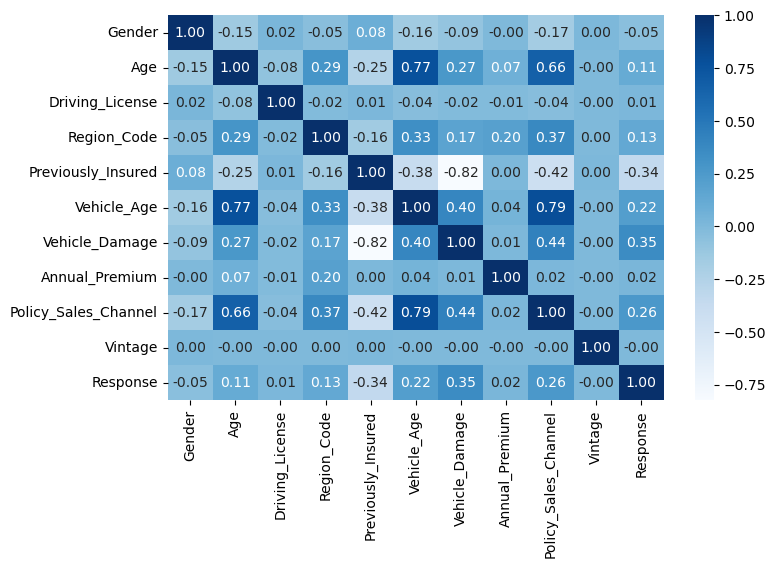

In [91]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

### Class Imbalance

In [92]:
df['Response'].value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

In [93]:
# Memisahkan antara feature dan target
X = df.drop(columns=['Response'])
y = df[['Response']]

In [94]:
# Oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_over, y_over = ros.fit_resample(X, y)

In [96]:
y_over.value_counts()

Response
0           334399
1           334399
Name: count, dtype: int64